In [12]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style
%matplotlib inline


statevec_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend('qasm_simulator')

def do_job(circuit):
    job = q.execute(circuit, backend=statevec_simulator)
    result = job.result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.n_qubits
    circuit.measure([i for i in range(n_qubits)], [i for i in range(n_qubits)])
    my_qobj = assemble(circuit)
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).simulator.run(my_qobj).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

In [13]:
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
circuit.h(0)  # hadamard gate on qubit0
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

AttributeError: 'QuantumCircuit' object has no attribute 'n_qubits'

NOISE MIGRATION IN QISKIT

In [1]:
from qiskit import *

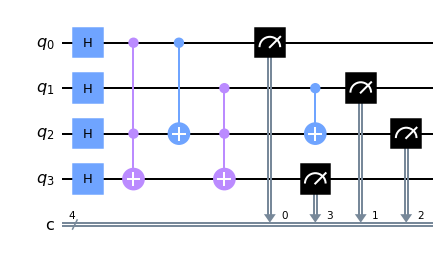

In [45]:
nqubits = 4
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.h(3)
circuit.ccx(0, 2, 3)
circuit.cx(0, 2)
circuit.ccx(1, 2, 3)
circuit.cx(1, 2)
circuit.measure([0, 1, 2, 3], [0, 1, 2, 3])
#circuit.measure([0, 3], [0, 1])
circuit.draw('mpl')

In [46]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend=simulator, shots=1024).result()

In [5]:
from qiskit.visualization import plot_histogram

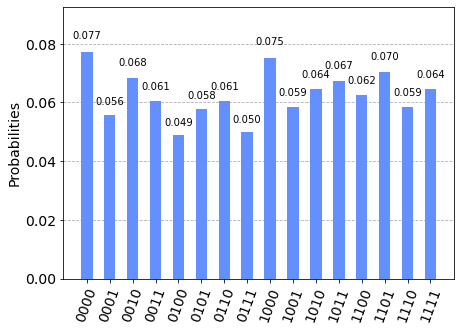

In [47]:
plot_histogram(sim_result.get_counts(circuit))

In [28]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmq_qasm_simulator')

ibmqfactory.load_account:WARNING:2021-06-26 09:00:37,755: Credentials are already in use. The existing account in the session will be replaced.


In [48]:
job = execute(circuit, backend=device, shots=1024)
#print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


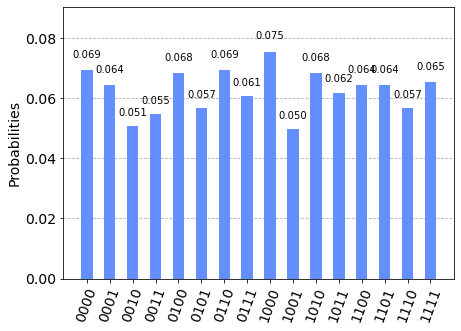

In [49]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

FINDING THE HISTOGRAM FOR THE ADDER CIRCUIT

In [66]:
nqubits = 4
circuit_sub = QuantumCircuit(nqubits, 3)
circuit_sub.h(2)
circuit_sub.h(3)
circuit_sub.x(0)
circuit_sub.ccx(0, 2, 3)
circuit_sub.cx(0, 2)
circuit_sub.ccx(1, 2, 3)
circuit_sub.cx(1, 2)
circuit_sub.x(2)
circuit_sub.measure([2, 3], [0, 1])

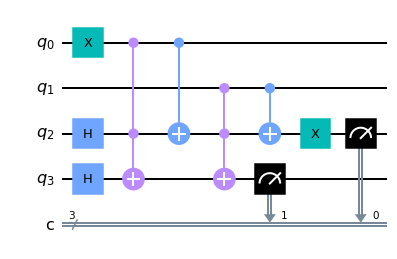

In [67]:
circuit_sub.draw('mpl')

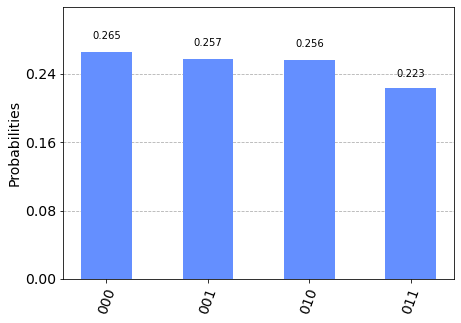

In [68]:
simulator_sub = Aer.get_backend('qasm_simulator')
sim_result_sub = execute(circuit_sub, backend=simulator, shots=1024).result()
plot_histogram(sim_result_sub.get_counts(circuit_sub))

Job Status: job has successfully run


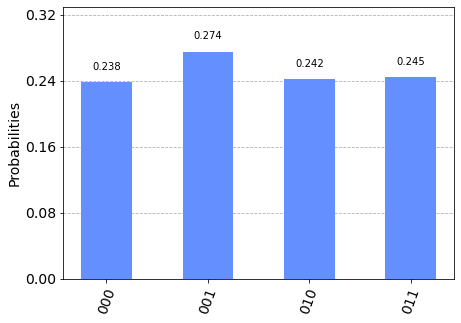

In [69]:
job = execute(circuit_sub, backend=device, shots=1024)
#print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)
device_result = job.result()
plot_histogram(device_result.get_counts(circuit_sub))

FINDING THE HISTOGRAM FOR THE ADDER CIRCUIT

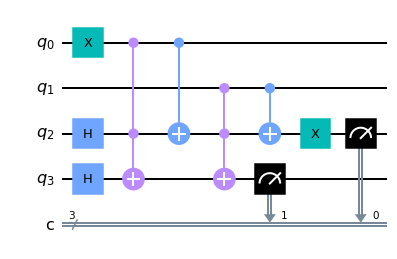

In [71]:
nqubits = 4
circuit_adder = QuantumCircuit(nqubits, 3)
circuit_adder.h(2)
circuit_adder.h(3)
circuit_adder.ccx(0, 2, 3)
circuit_adder.cx(0, 2)
circuit_adder.ccx(1, 2, 3)
circuit_adder.cx(1, 2)
circuit_adder.measure([2, 3], [0, 1])
circuit_sub.draw('mpl')

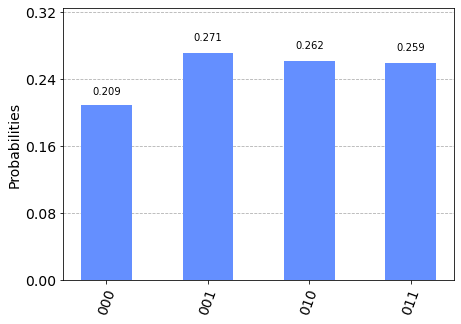

In [72]:
simulator_adder = Aer.get_backend('qasm_simulator')
sim_result_adder = execute(circuit_adder, backend=simulator, shots=1024).result()
plot_histogram(sim_result_adder.get_counts(circuit_adder))

60d6a660d2f1e44da1255eb8
Job Status: job has successfully run


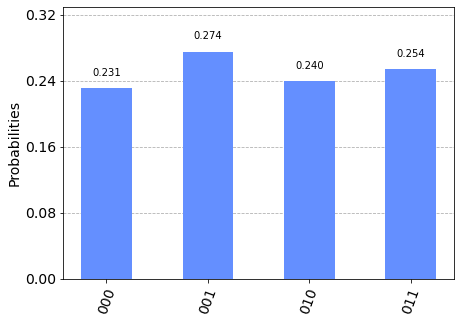

In [73]:
job = execute(circuit_adder, backend=device, shots=1024)
print(job.job_id())
job_monitor(job)
device_result = job.result()
plot_histogram(device_result.get_counts(circuit_adder))